In [79]:
import numpy as np
from pbcpy.grid import Grid, Grid_Space as gs
from pbcpy.grid_functions import Grid_Function_Base, Grid_Function as gf, Grid_Function_Reciprocal as gfr
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
at1 = np.identity(3)*10
at2 = np.identity(3)

In [81]:
grid1 = Grid(at=at1, nr=[100,100,100], origin=[0,0,0], units="Angstrom", convention='')
grid2 = Grid(at=at1, nr=[100,100,100], origin=[0,0,0], units="Angstrom", convention='mic')
grid3 = Grid(at=at1, nr=[100,100,100], origin=[0,0,0], units="Angstrom", convention='mic_scaled')

In [96]:
grid1.crystal_coord_array([0.5,0.5,0.5]).to_cart()
grid1.cartesian_coord_array([0.5,0.5,0.5]).to_crys()

Coord([ 0.05,  0.05,  0.05])

In [97]:
grid1.gaussianValues(center_array=[0.5,0.5,0.5],alpha=0.2)[10:52,50,50]

array([  2.76047418e-87,   5.36588917e-83,   8.12318018e-79,
         9.57716246e-75,   8.79374771e-71,   6.28836191e-67,
         3.50209107e-63,   1.51895085e-59,   5.13081536e-56,
         1.34975651e-52,   2.76535477e-49,   4.41237749e-46,
         5.48303280e-43,   5.30634407e-40,   3.99941388e-37,
         2.34759768e-34,   1.07319187e-31,   3.82082771e-29,
         1.05940963e-26,   2.28768780e-24,   3.84729931e-22,
         5.03896770e-20,   5.13988679e-18,   4.08311782e-16,
         2.52613554e-14,   1.21716027e-12,   4.56736020e-11,
         1.33477831e-09,   3.03794142e-08,   5.38488002e-07,
         7.43359757e-06,   7.99187055e-05,   6.69151129e-04,
         4.36341348e-03,   2.21592421e-02,   8.76415025e-02,
         2.69954833e-01,   6.47587978e-01,   1.20985362e+00,
         1.76032663e+00,   1.99471140e+00,   1.76032663e+00])

In [84]:
griddata = np.random.random(size=grid1.nr)

In [98]:
base_func1 = Grid_Function_Base(grid=grid1, griddata_3d=griddata)
base_func3 = base_func1.get_3dinterpolation([50,50,50])
base_func3.values.shape

(50, 50, 50)

In [99]:
base_func1.integral()

500.22870792181016

In [3]:
nr = [50,50,50]
grid = gs(at, nr)
print(grid.grid.at)
grid.reciprocal_grid.at

[[ 2.  0.  0.]
 [ 0.  3.  0.]
 [ 0.  0.  1.]]


array([[ 157.07963268,    0.        ,    0.        ],
       [   0.        ,  104.71975512,    0.        ],
       [   0.        ,    0.        ,  314.15926536]])

In [4]:
grid.reciprocal_grid.omega, grid.grid.omega

(5167712.7800499694, 6.0)

In [5]:
generic_gf = gf(grid)
generic_gfr = gfr(grid)
gaussian = generic_gf.gaussian(alpha=0.2,center_array=[0.5,0,0])

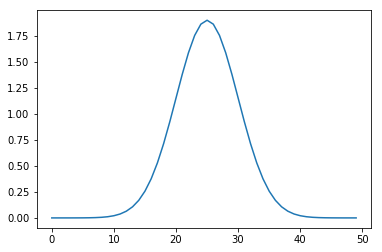

In [6]:
plt.plot(gaussian.values[:,1,1])
plt.show()

In [7]:
values = grid.grid.gaussianValues(alpha=0.2,center_array=[0.5,0,0])

In [8]:
gaussian2 = gf(grid,griddata_3d=values)

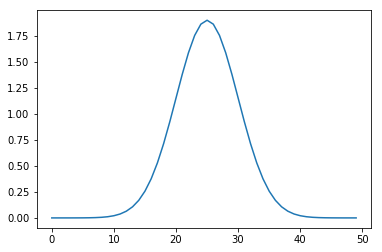

In [9]:
plt.plot(gaussian2.values[:,1,1])
plt.show()

In [10]:
G2 = generic_gfr.sqr_dist()

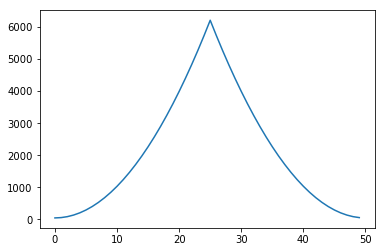

In [11]:
plt.plot(G2.values[:,1,1])
plt.show()

In [12]:
values = grid.reciprocal_grid.dist_values()

In [13]:
G = gfr(grid,griddata_3d=values)

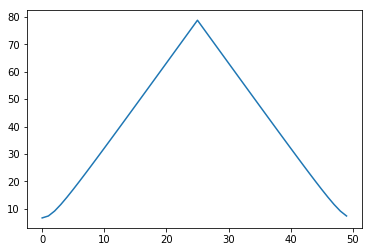

In [14]:
plt.plot(G.values[:,1,1])
plt.show()

In [15]:
kernel = G2.invert(g=4*np.pi)

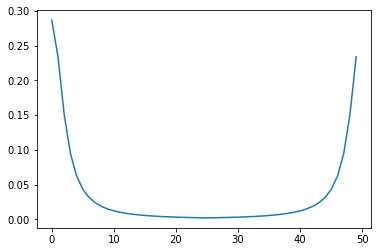

In [16]:
plt.plot(kernel.values[:,1,1])
plt.show()

In [17]:
ep = gaussian.energy_potential(a=1,kernel=kernel)

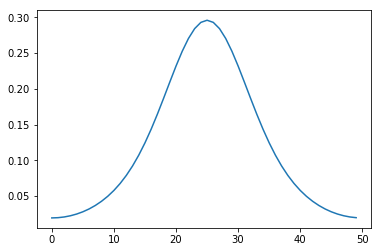

In [18]:
plt.plot(ep.values[:,1,1])
plt.show()

In [19]:
ed = gaussian.energy_density(a=2,b=1,c=2,kernel=kernel)

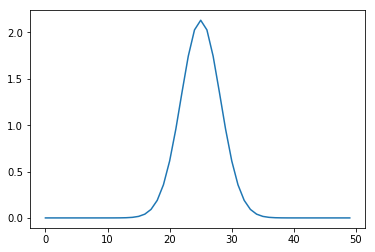

In [20]:
plt.plot(ed.values[:,1,1])
plt.show()